In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
day_2=pd.read_csv('trades_round_1_day_-2_nn.csv',delimiter=';')
day_2.head()

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,NaN,NaN,BANANAS,SEASHELLS,5003.0,1
1,0,NaN,NaN,PEARLS,SEASHELLS,9996.0,1
2,0,NaN,NaN,PEARLS,SEASHELLS,9996.0,1
3,1100,NaN,NaN,BANANAS,SEASHELLS,4998.0,1
4,1300,NaN,NaN,BANANAS,SEASHELLS,5000.0,4


In [26]:
day_2_banana=day_2[day_2['symbol']=='BANANAS']
#drop the 0 outlier:
day_2_banana=day_2_banana[day_2_banana['price']>=500]
day_2_banana.head()

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,NaN,NaN,BANANAS,SEASHELLS,5003.0,1
3,1100,NaN,NaN,BANANAS,SEASHELLS,4998.0,1
4,1300,NaN,NaN,BANANAS,SEASHELLS,5000.0,4
5,1300,NaN,NaN,BANANAS,SEASHELLS,5000.0,3
6,1400,NaN,NaN,BANANAS,SEASHELLS,4997.0,10


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(day_2_banana,day_2_banana['price'],random_state=42,test_size=0.2)

<Figure size 3500x1250 with 0 Axes>

5276

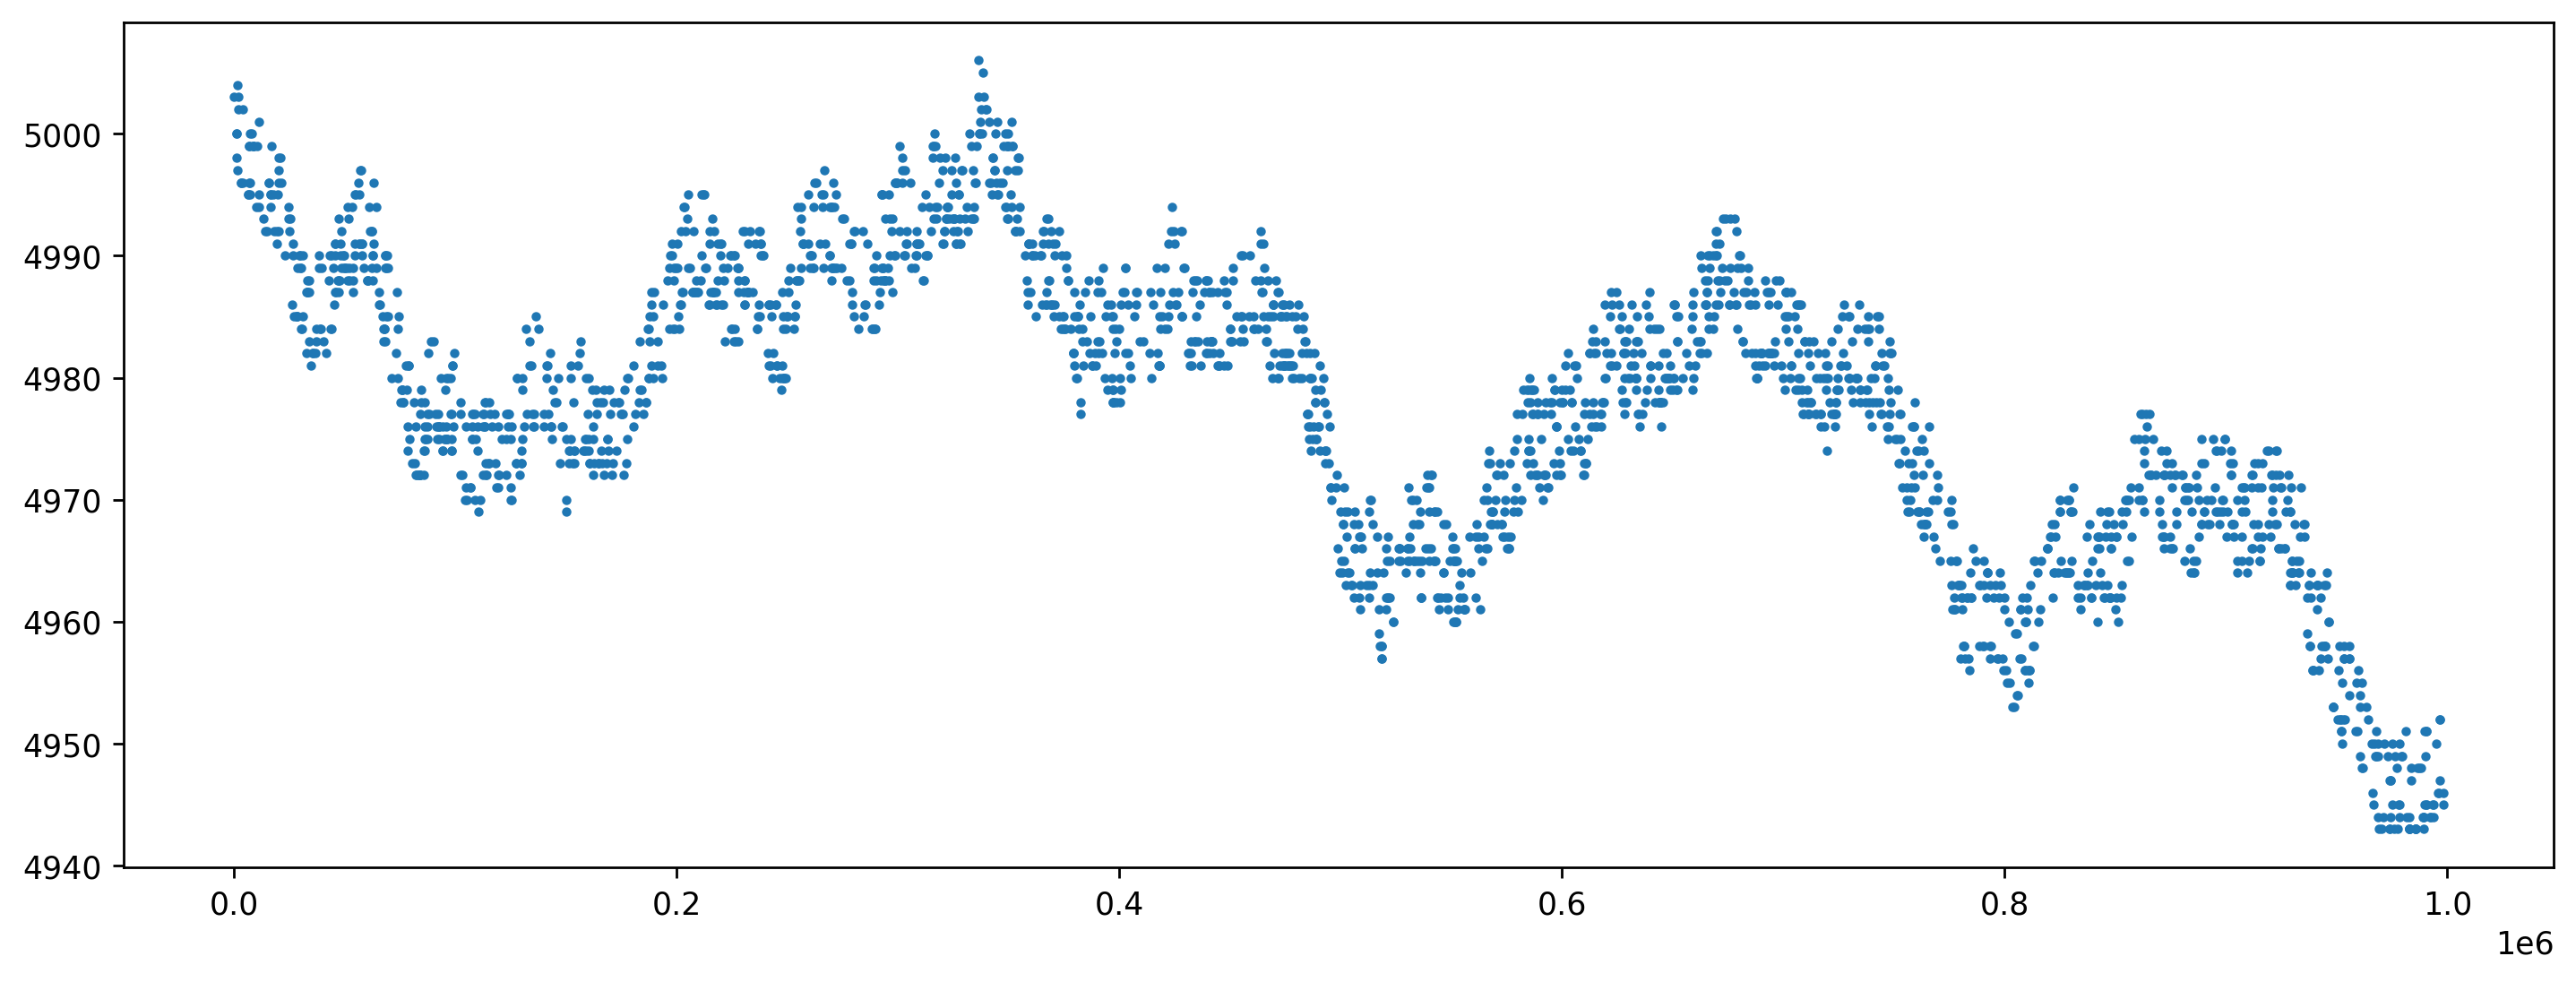

In [37]:
plt.figure(figsize=(14,5),dpi=250)
plt.scatter(x_train['timestamp'],x_train['price'],s=4)
x_train['price'].idxmin()

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDRegressor,Ridge
val_pipline=make_pipeline(PolynomialFeatures(degree=10,include_bias=False),StandardScaler())
preprocessing=ColumnTransformer([('time_stamp',StandardScaler(),['timestamp']),('scale+smooth',val_pipline,['price'])])
data_prepared=preprocessing.fit_transform(x_train)
preprocessing.get_feature_names_out()

array(['time_stamp__timestamp', 'scale+smooth__price',
       'scale+smooth__price^2', 'scale+smooth__price^3',
       'scale+smooth__price^4', 'scale+smooth__price^5',
       'scale+smooth__price^6', 'scale+smooth__price^7',
       'scale+smooth__price^8', 'scale+smooth__price^9',
       'scale+smooth__price^10'], dtype=object)

In [58]:
SGD=make_pipeline(preprocessing,SGDRegressor(penalty='l2',alpha=0.1,random_state=42,eta0=0.01,max_iter=1000))
SGD.fit(x_train,y_train)
y_predict=SGD.predict(x_test)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('time_stamp',
                                                  StandardScaler(),
                                                  ['timestamp']),
                                                 ('scale+smooth',
                                                  Pipeline(steps=[('polynomialfeatures',
                                                                   PolynomialFeatures(degree=10,
                                                                                      include_bias=False)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['price'])])),
                ('sgdregressor', SGDRegressor(alpha=0.1, random_state=42))])

In [61]:
from sklearn.model_selection import cross_val_score,cross_val_predict
SGD_rmse=-cross_val_score(SGD,x_train,y_train,scoring='neg_root_mean_squared_error',cv=10)
print(SGD_rmse)

[0.14996342 0.1446874  0.17821827 0.17308221 0.18860451 0.17188011
 0.1551688  0.19981356 0.20088237 0.17793028]


In [47]:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(y_test,y_predict))
RMSE

0.1613630411054708

In [63]:
day_1=pd.read_csv('trades_round_1_day_-1_nn.csv',delimiter=';')
day_1_banana=day_1[day_1['symbol']=='BANANAS']
day_1_banana.head()
day_1_y_predict=SGD.predict(day_1_banana)
RMSE2=np.sqrt(mean_squared_error(day_1_banana[['price']],day_1_y_predict))
RMSE2

,timestamp,buyer,seller,symbol,currency,price,quantity
1,0,NaN,NaN,BANANAS,SEASHELLS,4952.0,1
3,1300,NaN,NaN,BANANAS,SEASHELLS,4949.0,3
6,1900,NaN,NaN,BANANAS,SEASHELLS,4950.0,1
8,2400,NaN,NaN,BANANAS,SEASHELLS,4947.0,1
9,2500,NaN,NaN,BANANAS,SEASHELLS,4949.0,2


2.285967455643225